# 105 In-Class Assignment: Determinants & Eigenvectors

<img src="http://www.mathnstuff.com/math/algebra/gif/asys1.gif" alt="Depiction of Cramer's Rule with two equations and two variables">  

Image from:[http://www.mathnstuff.com/](http://www.mathnstuff.com/)  
 

### Agenda for today's class

1. [Review Pre-class Assignment](#Review_Pre-class_Assignment)
1. [Algorithm to calculate the determinant](#Algorithm_to_calculate_the_determinant)
1. [Using Cramer's rule to solve $Ax=b$](#Using_Cramers_rule)
1. [Introduction to Markov Models](#Introduction-to-Markov-Models)
1. [Another Markov Example](#Another-Markov-Model-Example)


----

<a name="Review_Pre-class_Assignment"></a>
## 1. Review Pre-class Assignment

* [09--Determinants_pre-class-assignment.ipynb](09--Determinants_pre-class-assignment.ipynb)

---
<a name="Algorithm_to_calculate_the_determinant"></a>
## 2. Algorithm to calculate the determinant
Consider the following recursive algorithm (algorithm that calls itself) to determine the determinate of a $n\times n$ matrix $A$ (denoted $|A|$), which is the sum of the products of the elements of any row or column. i.e.:

$$i\text{th row expansion:     } |A| = a_{i1}C_{i1} + a_{i2}C_{i2} + \ldots + a_{in}C_{in} $$
$$j\text{th column expansion:     } |A| = a_{1j}C_{1j} + a_{2j}C_{2j} + \ldots + a_{nj}C_{nj} $$

where $C_{ij}$ is the cofactor of $a_{ij}$ and is given by:

$$ C_{ij} = (-1)^{i+j}|M_{ij}|$$

and $M_{ij}$ is the matrix that remains after deleting row $i$ and column $j$ of $A$.

Here is some code that tries to implement this algorithm.  

In [1]:
## Import our standard packages packages
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
sym.init_printing(use_unicode=True)

In [2]:
import copy
import random

def makeM(A,i,j):
    ''' Deletes the ith row and jth column from A'''
    M = copy.deepcopy(A)
    del M[i]
    for k in range(len(M)):
        del M[k][j]
    return M

def mydet(A):
    '''Calculate the determinant from list-of-lists matrix A'''
    if type(A) == np.matrix:
        A = A.tolist()   
    n = len(A)
    if n == 2:
        det = (A[0][0]*A[1][1] - A[1][0]*A[0][1]) 
        return det
    det = 0
    i = 0
    for j in range(n):
        M = makeM(A,i,j)
        
        #Calculate the determinant
        det += (A[i][j] * ((-1)**(i+j+2)) * mydet(M))
    return det

The following code generates an $n \times n$ matrix with random values from 0 to 10.  
Run the code multiple times to get different matrices:

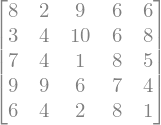

In [3]:
#generate Random Matrix and calculate it's determinant using numpy
n = 5
s = 10
A = [[round(random.random()*s) for i in range(n)] for j in range(n)]
A = np.matrix(A)
#print matrix
sym.Matrix(A)


&#9989; **<font color='red'>DO THIS:</font>** Use the randomly generated matrix ($A$) to test the above ```mydet``` function and compare your result to the ```numpy.linalg.det``` function.

In [4]:
# Put your test code here

&#9989; **<font color=red>QUESTION:</font>** Are the answers to ```mydet``` and ```numpuy.linalg.det``` exactly the same every time you generate a different random matrix?  If not, explain why.

Put your answer here

&#9989; **<font color=red>QUESTION:</font>** On line 26 of the above code, you can see that algorithm calls itself.  Explain why this doesn't run forever.

Put your answer here

---

<a name="Using_Cramers_rule"></a>
## 3. Using Cramer's rule to solve $Ax=b$

Let $Ax = b$ be a system of $n$ linear equations in $n$ variables such that $|A| \neq 0$. the system has a unique solution given by:

$$x_1 = \frac{|A_1|}{|A|}, x_2 = \frac{|A_2|}{|A|}, \ldots,  x_n = \frac{|A_n|}{|A|}$$

where $A_i$ is the matrix obtained by replacing column $i$ of $A$ with $b$. The following function generates $A_i$ by replacing the $i$th column of $A$ with $b$:

In [5]:
def makeAi(A,i,b):
    '''Replace the ith column in A with b'''
    if type(A) == np.matrix:
        A = A.tolist()
    if type(b) == np.matrix:
        b = b.tolist()
    Ai = copy.deepcopy(A)
    for j in range(len(Ai)):
        Ai[j][i] = b[j][0]
    return Ai

&#9989; **<font color=red>DO THIS:</font>** Create a new function called ```cramersRule```, which takes $A$ and $b$ and returns $x$ using the Cramer's rule. **Note:** Use ```numpy``` and NOT ```mydet``` to find the required determinants. ```mydet``` is too slow. 

In [6]:
# Stub code. 

def cramersRule(A,b):
    detA = np.linalg.det(A)
    x = []    
    #####Start of your code here#####  
 

    #####End of your code here#####  
    
    return x

&#9989; **<font color=red>QUESTION:</font>** Test your ```cramersRule``` function on the following system of linear equations:

$$ x_1 + 2x_2 = 3$$
$$3x_1 + x_2 = -1$$

In [7]:
#Put your answer to the above quesiton here

&#9989; **<font color=red>QUESTION:</font>** Verify the above answer by using the ```np.linalg.solve``` function:

In [8]:
#Put your answer to the above quesiton here

&#9989; **<font color=red>QUESTION:</font>** Test your ```cramersRule``` function on the following system of linear equations and verify the answer by using the ```np.linalg.solve``` function: 

$$ x_1 + 2x_2 +x_3 = 9$$
$$ x_1 + 3x_2 - x_3 = 4$$
$$ x_1 + 4x_2 - x_3 = 7$$

In [9]:
#Put your answer to the above quesiton here

&#9989; **<font color=red>QUESTION:</font>** Cramer's rule is a $O(n!)$ algorithm and the Gauss-Jordan (or Gaussian) elimination is $O(n^3)$.  What advantages does Cramer's rule have over elimination?

Put your answer here.

-----
<a name=Introduction-to-Markov-Models></a>
## 4.  Introduction to Markov Models


>In probability theory, a Markov model is a stochastic model used to model randomly changing systems. 
It is assumed that future states depend only on the current state, not on the events that occurred before it.
>
> <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/2b/Markovkate_01.svg/1126px-Markovkate_01.svg.png" width=25%>
> A diagram representing a two-state Markov process, with the states labelled E and A. 
Each number represents the probability of the Markov process changing from one state to another state, with the direction indicated by the arrow. 
For example, if the Markov process is in state A, then the probability it changes to state E is 0.4, while the probability it remains in state A is 0.6.

From: [Wikipedia](https://en.wikipedia.org/wiki/Markov_model)

In [10]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import sympy as sym
sym.init_printing(use_unicode=True)

The above state model can be represented by a transition matrix. 

$$
\begin{array}{cc}
& \text{Current State}  \\
P =  &
\begin{bmatrix}
    p_{A\rightarrow A} & p_{E\rightarrow A}  \\
    p_{A\rightarrow E} & p_{E\rightarrow E} 
\end{bmatrix}
\end{array}
\text{Next state}
$$

In other words we can write the above as follows

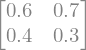

In [11]:
A = np.matrix([[0.6, 0.7],[0.4, 0.3]])
sym.Matrix(A)

Notice how the columns in the matrix all add to one. This is because all of the transition probabilities out of a matrix must add to 100 percent. 

Now, consider the following house map with cats in each room...

At each time step, there is an equal probability of a cat staying in their current room or moving to a new room. 
If a cat chooses to leave a room, then there is an equal chance of that cat picking any of the doors in the room to leave. 

<img src="https://lh4.googleusercontent.com/CGFHfJgtrPu-2bZPhPul1ll8B3tqC1Vs8jRwnZ13v8MqRAagWhrSmJ0cznYIP3ePg5co5AVI8g=w712" alt="Top down diagram of a house with three rooms (see text for more description" width="50%">

&#9989;**<font color=red>DO THIS :</font>** Try to draw a Markov chain (Markov matrix) for the above system of equations. Be prepared to share your diagram with the class. 

A Markov chain can be represented as a Markov transition model of the form $Ax=b$. 
Where $A$ is your probability tranisition matrix (often represented as a $P$ instead of an $A$). 
$x$ is the state before the transition and $b$ is the state after the transition.

&#9989;**<font color=red>QUESTION:</font>** Generate a Markov transition model represented as a matrix $P$ of the form:
$$
\begin{array}{ccc}
& \text{Current Room}  \\
P =  &
\begin{bmatrix}
    p_{11} & p_{12} & p_{13} \\
    p_{21} & p_{22} & p_{23} \\
    p_{31} & p_{32} & p_{33} 
\end{bmatrix}
\end{array}
\text{Next Room}
$$

Where $p_{ij}$ are probability transitions of the cat moving between rooms (from room $j$ to room $i$):

In [12]:
##put your answer here

In [13]:
from answercheck import checkanswer

checkanswer.matrix(P,'1001a6fa07727caf8ce05226b765542c');

ModuleNotFoundError: No module named 'answercheck'

&#9989;**<font color=red>QUESTION:</font>**  Let's assume that the system starts with; 6 cats in room 1, 15 cats in room 2, and 3 cats in room 3. How many cats will be in each room after one time step (Store the values in a vector called ```current_state```)?

In [ ]:
#Put your answer to the above question here.

In [ ]:
from answercheck import checkanswer
checkanswer.vector(current_state,'98d5519be82a0585654de5eda3a7f397');

&#9989;**<font color=red>QUESTION:</font>** The following code will plot the number of cats as a function of time ($t$).  When this system converges, what is the steady state?

In [ ]:
#Define Start State
room1 = [6]
room2 = [15]
room3 = [3]

current_state = np.matrix([room1, room2, room3])

for i in range(10):
    #update Current State
    current_state = P*current_state
    
    #Store history for each room
    room1.append(current_state[0])
    room2.append(current_state[1])
    room3.append(current_state[2])
    
plt.plot(room1, label="room1");
plt.plot(room2, label="room2");
plt.plot(room3, label="room3");
plt.legend();
print(current_state)

Inspect the generated graph and put your answer to the above question here

&#9989;**<font color=red>QUESTION:</font>**  Calculate the eigenvalues and eigenvectors of your $P$ transition matrix.  

In [ ]:
##put your answer here

The eigenvector associated with the eigenvalue of 1 represents the steady state probability for our original transition matrix $P$.  

&#9989;**<font color=red>DO THIS:</font>** make a new vector called ```steadystate``` from the eigenvector of your $P$ matrix with a eigenvalue of 1.

In [ ]:
## Put your answer here

In [ ]:
from answercheck import checkanswer
checkanswer.detailedwarnings = False
checkanswer.eq_vector(steadystate,'462ea7dca751db590ed09356886ad060')

Since the ```steadystate``` vectors represent long term probibilities, they should sum to one (1).  However, most programming libraries (ex. numpy and sympy) return "normalized" eigenvectors to length of 1 (i.e. norm(e)==1). 

&#9989;**<font color=red>DO THIS:</font>**  Correct for the normalization by multiplying the ```steadystate``` eigenvector by a constant such that the sum of the vector elements add to 1. 

In [ ]:
#Put your answer here

&#9989;**<font color=red>DO THIS:</font>**  Think about the cats problem, because one cat has to be in one of the three rooms. That means, the total number of cats will not change. If we add the number of cats at all rooms together, this number has to be the same. Therefore, if we start will 6+15+3=24 cats, there are also 24 cats at the ```steadystate```. Modify the steadystate to make sure the total number of cats is 24.

In [ ]:
# put answer here

&#9989;**<font color=red>QUESTION:</font>** Why does the sum of the numbers at every stage remain the same? 

Put your answer here

---
<a name=Another-Markov-Model-Example></a>
## 5. Another Markov Model Example



> A sports broadcaster wishes to predict how many Michigan residents prefer University of Michigan teams and how many prefer Michigan State teams. 
She noticed that, year after year, most people stick with their preferred team; however, about 5% of Michigan fans switch to Michigan State, and about 3% of Michigan State fans switch to Michigan each year. 
However, there is no noticeable difference in the state's population of 10 million's preference at large; in other words, it seems Michigan sports fans have reached a stationary distribution. What might that be?
 <p style="text-align: right;">  This problem is from https://brilliant.org/wiki/stationary-distributions/ </p>

&#9989;**<font color=red>DO THIS:</font>** Try to draw a Markov chain for the above system of equations. Discuss your diagram with your classmate.

&#9989; **<font color=red>QUESTION:</font>**  Write a system of linear equations that represents how the populations change each year. Check your equations by writing the matrix ```P``` for the probability transitions matrix in your equations. Make sure your first row/column represents MSU and the second row/column represents UofM. 

In [ ]:
# Put your answer here

In [ ]:
from answercheck import checkanswer

checkanswer.vector(P,'1d3f7cbebef4b610f3b0a2d97609c81f');

&#9989; **<font color=red>QUESTION:</font>**   Calculate the eigenvalues and eigenvectors of your $P$ transition matrix.  

In [ ]:
#Put the answer to the above quesiton here. 

&#9989; **<font color=red>QUESTION:</font>**   Assuming each team starts with 500,000 fans, what is the steady state of this model? (i.e. in the long term how many Spartan and Wolverine fans will there be?).

In [ ]:
#Put your answer here

In [ ]:
steadystate

In [ ]:
from answercheck import checkanswer
checkanswer.float(spartans,'06d263de629f4dbe51eafd524b69ddd9');

In [ ]:
from answercheck import checkanswer
checkanswer.float(wolverines,'62d63699c8f7b886ec9b3cb651bba753');